In [1]:
# importing the required libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')
df = pd.read_csv('Purchase_Fraud_Data.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


In [2]:
#Checking the shape
df.shape

(151112, 12)

In [3]:
#Checking the columns types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [4]:
#Checking the distinct value counts of target column: class
df['class'].value_counts(normalize=True)*100

0    90.635423
1     9.364577
Name: class, dtype: float64

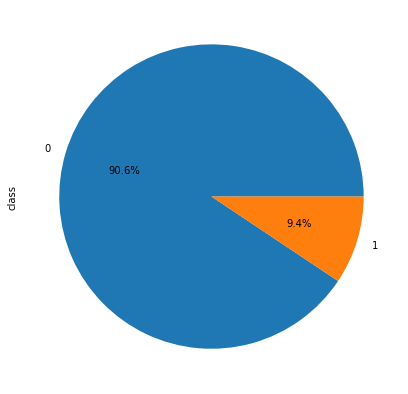

In [5]:
#plot number values class 0 and 1 
df['class'].value_counts().plot.pie(autopct='%.1f%%', figsize=(7, 7));

### <font color='green'>As we can see above that given dataset is unbalanced because the percentage for class 0 and 1 are not equal</font>

In [6]:
#Columnwise count of null values
df.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex               4927
ip_address           0
class                0
category             0
dob               4924
dtype: int64

### <font color='green'>As we can see above  columns: 'sex' and 'dob' of the dataset have the null values</font>

In [7]:
#Viewing some basic statistical details for columns with dtype as numeric
df.describe()

,user_id,purchase_value,ip_address,class
count,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,50521.469003,2.152145e+09,0.093646
std,115369.285024,28533.667117,1.248497e+09,0.291336
min,2.000000,1016.000000,5.209350e+04,0.000000
25%,100642.500000,25919.000000,1.085934e+09,0.000000
50%,199958.000000,50484.000000,2.154770e+09,0.000000
75%,300054.000000,75296.250000,3.243258e+09,0.000000
max,400000.000000,100092.000000,4.294850e+09,1.000000


In [8]:
#Viewing some basic statistical details for columns with dtype as'object'
df.describe(include=['O'])

,signup_time,purchase_time,device_id,source,browser,sex,category,dob
count,151112,151112,151112,151112,151112,146185,151112,146188
unique,151112,150663,137956,3,5,2,5,13745
top,2015-02-24 22:55:49,2015-09-10 09:04:53,CQTUVBYIWWWBC,SEO,Chrome,M,electronics,24-7-1982
freq,1,3,20,60615,61432,85445,32056,37


In [9]:
#Checking uniqueness of column: user_id
len(df)==len(df['user_id'].unique())

True

### <font color='green'>Based on above observation.</font>
### <font color='green'>1. We can see that there is  missing entries for the features: sex and dob and these are not very insightful later we can remove them</font>
### <font color='green'>2. All the user ids are unique in the table.</font>
### <font color='green'>3. In terms of the percentage of fraudulent activities, current mean rate of fraudulent transactions is 9.36%.</font>

## <font color='blue'>The target variable is class, and there are some features in the table that we can play with for the purpose of feature engineering, this include:</font>
### <font color='green'>Calculate time difference between sign-up time and purchase time;</font>
### <font color='green'>Check whether different users use the same device, which could indicate fake accounts;</font>
### <font color='green'>Check whether different users have the same IP address, which could also be an indicator;</font>
### <font color='green'>Explore other temporal patterns, such as week of the year and day of the week.</font>

In [10]:
df.head(1)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976


In [11]:
# Conversion of datatypes for columns: 'signup_time' and 'purchase_time' to datetime64
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['signup_time'] = pd.to_datetime(df['signup_time'])

In [12]:
# Create the time difference(in days) between signup and purchase time
df['time_diff']=(df['purchase_time']-df['signup_time']).apply(lambda x:x.days)

In [13]:
df.head(1)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976,52


In [14]:
df.groupby('device_id')['user_id'].count().reset_index().rename(columns={'user_id':'device_count'})

,device_id,device_count
0,AAALBGNHHVMKG,1
1,AAAWIHVCQELTP,1
2,AAAXJHWCLISKY,1
3,AAAXXOZJRZRAO,11
4,AABFGRPBQHWFQ,1
...,...,...
137951,ZZZGSIJRNCXBJ,1
137952,ZZZIKLJSVSQMF,1
137953,ZZZKJIZHJEDFN,1
137954,ZZZMVOGBAJVTM,1


In [15]:
# Check whether different users use the same device and create a new column to count repeated device use
Temp1=df.groupby('device_id')['user_id'].count().reset_index().rename(columns={'user_id':'device_count'})
df=df.merge(Temp1,how='left',on='device_id')

In [16]:
# Check whether different users use the same IP address and create a new column to count repeated IP use
Temp2=df.groupby('ip_address')['user_id'].count().reset_index().rename(columns={'user_id':'ip_count'})
df=df.merge(Temp2,how='left',on='ip_address')

In [17]:
# Create week of year and day of week columns for sign time and purchase time
df['signup_week']=df['signup_time'].apply(lambda x:x.week)
df['signup_day']=df['signup_time'].apply(lambda x:x.dayofweek)
df['purchase_week']=df['purchase_time'].apply(lambda x:x.week)
df['purchase_day']=df['purchase_time'].apply(lambda x:x.dayofweek)

In [18]:
# Show the new data table
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976,52,1,1,9,1,16,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962,0,1,1,23,6,24,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962,0,12,12,1,3,1,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974,5,1,1,18,1,19,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970,50,1,1,30,1,37,2


In [19]:
len(df['purchase_day'].unique())

7

### <font color='green'>Now, we may select what features to include in our machine learning model. We will drop user_id, device_id and ip_address as the three columns are just identifiers and don't contain much useful information in themselves. We have also engineered new features from time-related features, therefore, we can also drop signup_time and purchase_time.</font>

In [20]:
columns = ['user_id','signup_time','purchase_time','device_id','ip_address']
df_new=df.drop(columns,axis=1)
df_new.head()

,purchase_value,source,browser,sex,class,category,dob,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day
0,65278,SEO,Chrome,M,0,home_essentials,22-2-1976,52,1,1,9,1,16,5
1,96399,Ads,Chrome,F,0,apparels,2-1-1962,0,1,1,23,6,24,0
2,57296,SEO,Opera,M,1,electronics,5-3-1962,0,12,12,1,3,1,3
3,43650,SEO,Safari,M,0,health_care,3-7-1974,5,1,1,18,1,19,0
4,45016,Ads,Safari,M,0,home_essentials,25-8-1970,50,1,1,30,1,37,2


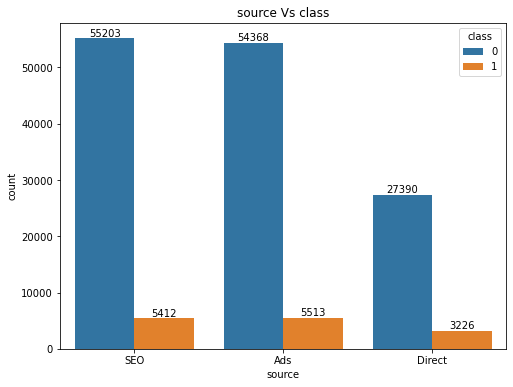

In [21]:
# Countplot of type feature
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_new,x='source',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('source Vs class')
plt.show()

### <font color='green'>Sources: "Ads" and "SEO" are most fradulent as compare to direct which means if the purchase is done direct then it is more safer and if it is done through "Ads" and "SEO" then they are more suspicious and can cause fraud</font>

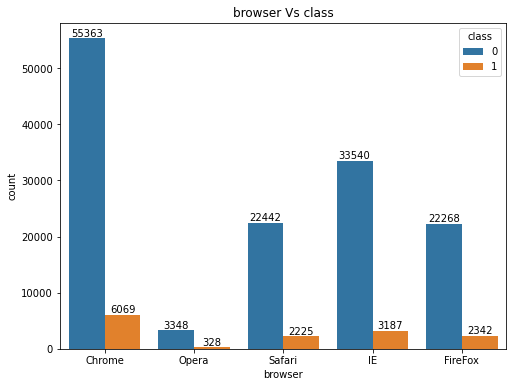

In [22]:
# Countplot of type feature
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_new,x='browser',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('browser Vs class')
plt.show()

### <font color='green'>browser: "chrome" is the most fradulent and "opera" is the least fradulent which means if the purchase is done </font>

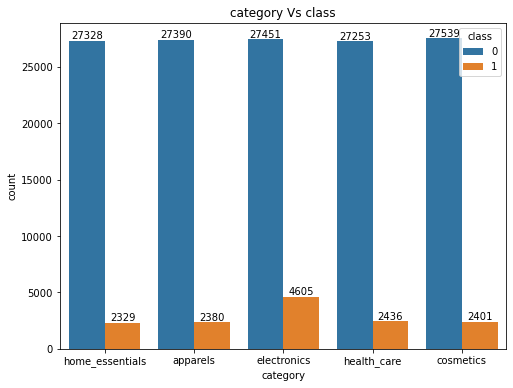

In [23]:
# Countplot of type feature
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_new,x='category',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('category Vs class')
plt.show()

### <font color='green'>Purchase done for electronics items are most fradulent while for home_essential its least fradulent</font>

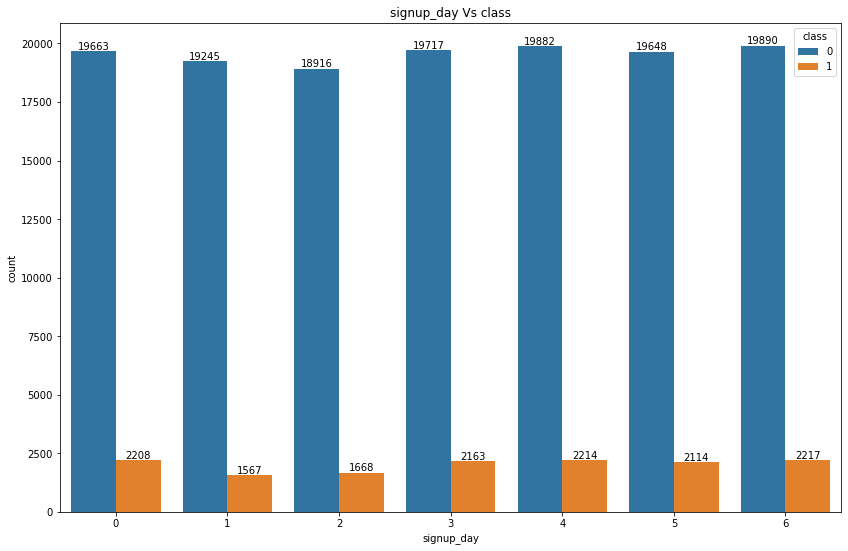

In [24]:
# Countplot of type feature
plt.figure(figsize=(14,9))
ax = sns.countplot(data=df_new,x='signup_day',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('signup_day Vs class')
plt.show()

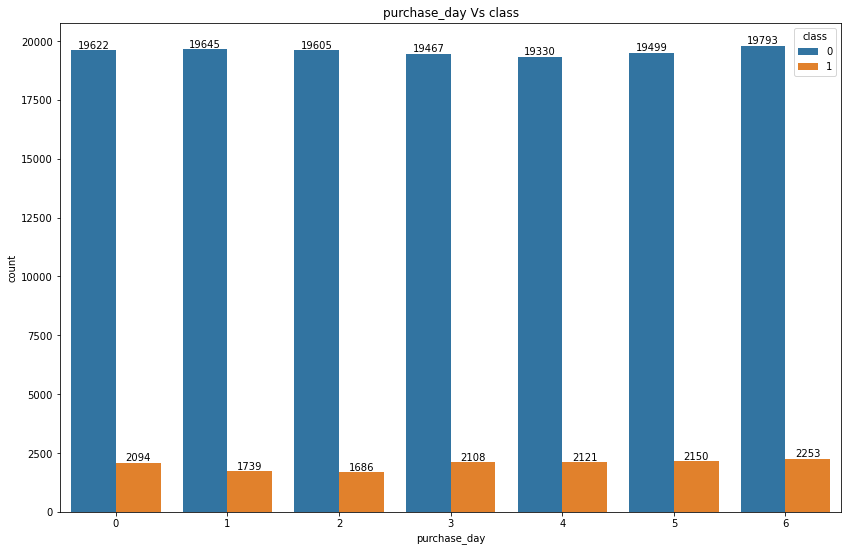

In [25]:
# Countplot of type feature
plt.figure(figsize=(14,9))
ax = sns.countplot(data=df_new,x='purchase_day',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('purchase_day Vs class')
plt.show()

### <font color='green'>As we can see above that the purchases on weekend are more fradulents as comparision to week days</font>

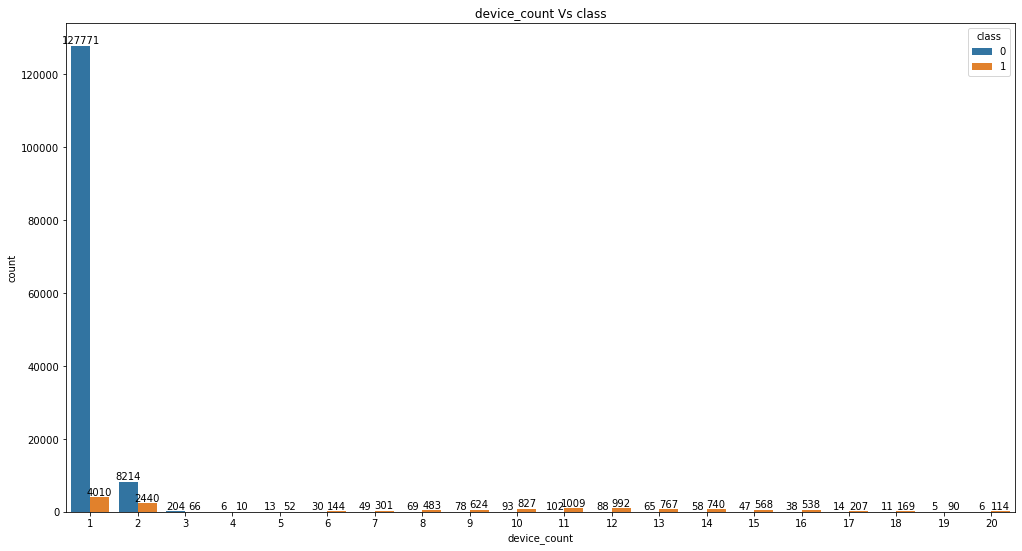

In [26]:
# Countplot of type feature
plt.figure(figsize=(17,9))
ax = sns.countplot(data=df_new,x='device_count',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('device_count Vs class')
plt.show()

### <font color='green'>As we can if the device count is more than 2 then it is completely fraudulent which gives the insight that if the same device is used at multiple times then it might be fraulent</font>

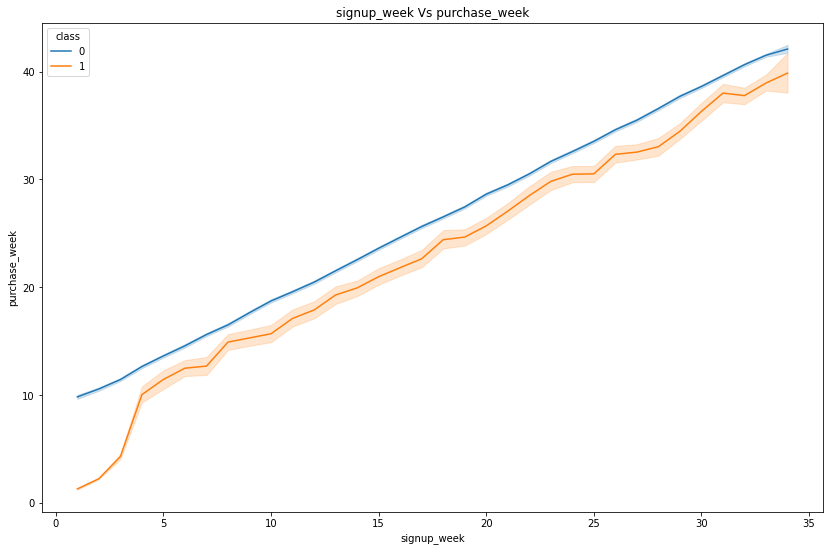

In [27]:
# Countplot of type feature
plt.figure(figsize=(14,9))
ax = sns.lineplot(data=df_new,x='signup_week',y='purchase_week',hue='class')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('signup_week Vs purchase_week')
plt.show()

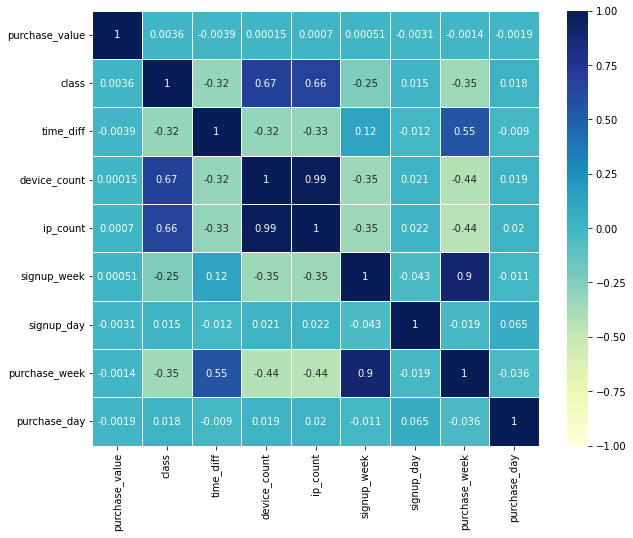

In [28]:
# Pre-check correlation between features and our target variable 'class' using heatmap.
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df_new.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, cbar=True, linewidths=0.5)
plt.show()

### <font color='blue'>As shown above, device count and ip count have high correlation with the target.</font>

### <font color='green'>Next, we will move on to pick and apply a machine learning model. I will use random forest classifier model here because: random forest requires very little time to optimize (its default parameters are often close to the best ones), and it is strong with both continuous and discrete variables.Random forest can handle categorical variables without the need to convert them to numerical ones, which will make things easier for us in this case.</font>

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   purchase_value  151112 non-null  int64 
 1   source          151112 non-null  object
 2   browser         151112 non-null  object
 3   sex             146185 non-null  object
 4   class           151112 non-null  int64 
 5   category        151112 non-null  object
 6   dob             146188 non-null  object
 7   time_diff       151112 non-null  int64 
 8   device_count    151112 non-null  int64 
 9   ip_count        151112 non-null  int64 
 10  signup_week     151112 non-null  int64 
 11  signup_day      151112 non-null  int64 
 12  purchase_week   151112 non-null  int64 
 13  purchase_day    151112 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 21.3+ MB


In [31]:
# Define features and target
feature = ['purchase_value', 'source', 'browser', 'sex', 'time_diff', 'device_count', 'ip_count',
           'signup_week', 'signup_day', 'purchase_week','purchase_day']
target = 'class'
X=df_new[feature]
y=df_new[target]

In [32]:
# Split the data into 70% training and 30% test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [33]:
X_train.dtypes

purchase_value     int64
source            object
browser           object
sex               object
time_diff          int64
device_count       int64
ip_count           int64
signup_week        int64
signup_day         int64
purchase_week      int64
purchase_day       int64
dtype: object

In [34]:
features_to_encode = list(X_train.select_dtypes(include = ['object']).columns)

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [36]:
#build the classifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=50,
                      max_features='auto')

In [37]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['source', 'browser',
                                                   'sex'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=50))])

In [38]:
from sklearn.metrics import roc_curve, auc, classification_report,accuracy_score
#test the classifier
y_test_pred = pipe.predict(X_test)

#calculate accuracy
accuracy_score(y_test, y_test_pred)
#accuracy_score(y_train, pipe.predict(X_train))

0.96265021970459

In [39]:
# Print out classification report
print(classification_report(y_test, (y_test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     34266
           1       0.91      0.66      0.77      3512

    accuracy                           0.96     37778
   macro avg       0.94      0.83      0.87     37778
weighted avg       0.96      0.96      0.96     37778



In [40]:
y_train_pred = pipe.predict(X_train)
train_fpr, train_tpr,_=roc_curve(y_train,y_train_pred)
train_auc = np.round(auc(train_fpr, train_tpr),3)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

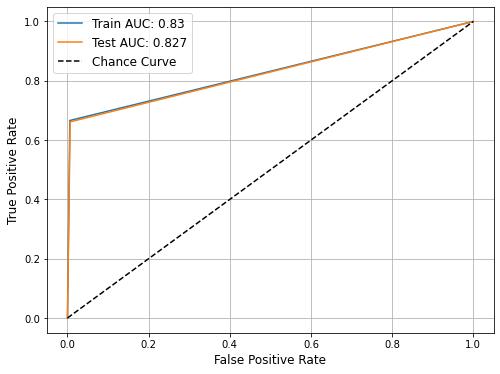

In [41]:
# Plot ROC curve and AUC
train_fpr = np.insert(train_fpr, 0, 0)
train_tpr = np.insert(train_tpr, 0, 0)
test_fpr = np.insert(test_fpr, 0, 0)
test_tpr = np.insert(test_tpr, 0, 0)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.plot(train_fpr, train_fpr, 'k--', label='Chance Curve')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

### <font color='blue'>As shown in above classification report and ROC curve, the recall rate of label 1 is 0.67, meaning out of true fraudulent samples, 67% are correctly predicted. Since this challenge is about classification of fraudulent activities, it is critical to correctly classify every fraudulent activity in order to minimize the risk. This means we may need to reduce the number of false negatives (fraudulent but incorrectly classified as non-fraudulent) by lowering the threshold from the default 0.5 level, even if this may result in more false positives (non-fraudulent activities classfied as fraudulent).</font>

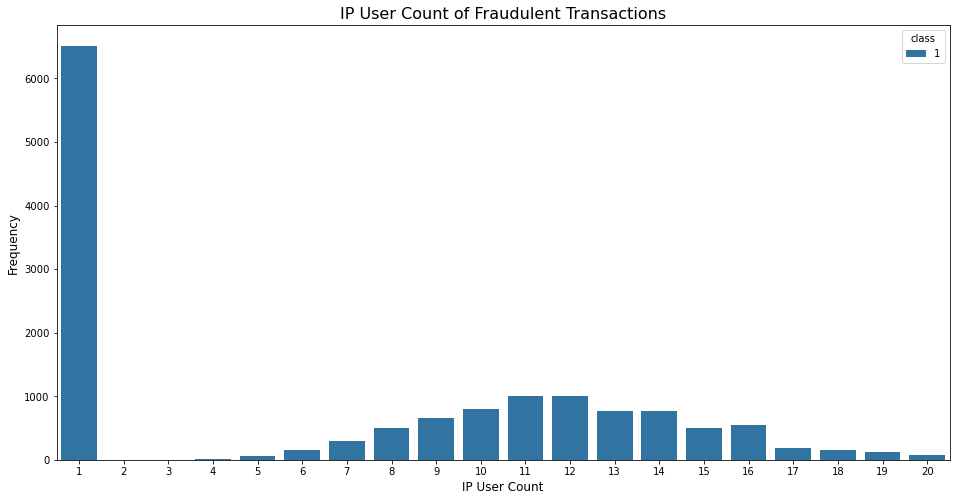

In [42]:
fig,ax = plt.subplots(figsize=(16,8))
sns.countplot('ip_count', data=df_new[df_new['class']==1], hue='class',ax = ax)
ax.set_title('IP User Count of Fraudulent Transactions', fontsize=16)
ax.set_xlabel('IP User Count', fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

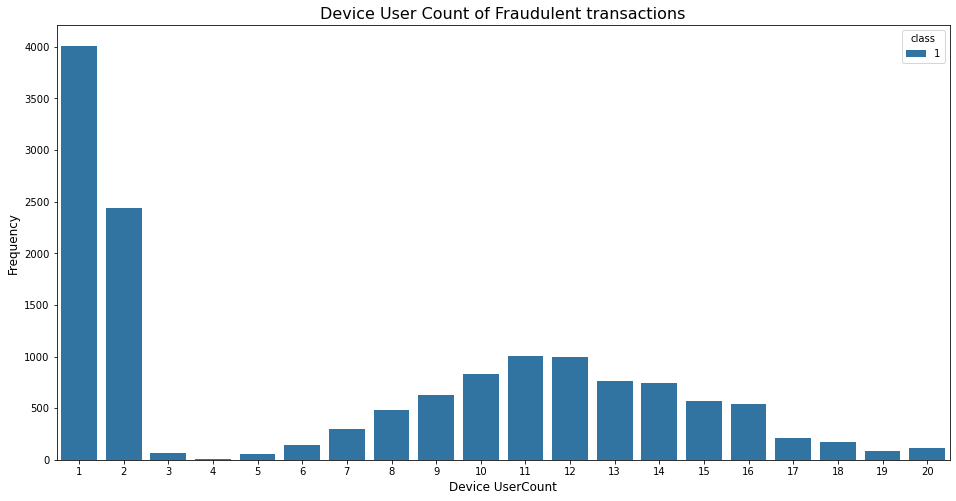

In [43]:
fig,ax = plt.subplots(figsize=(16,8))
sns.countplot('device_count', data=df_new[df_new['class']==1], hue='class',ax = ax)
ax.set_title('Device User Count of Fraudulent transactions', fontsize=16)
ax.set_xlabel('Device UserCount', fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

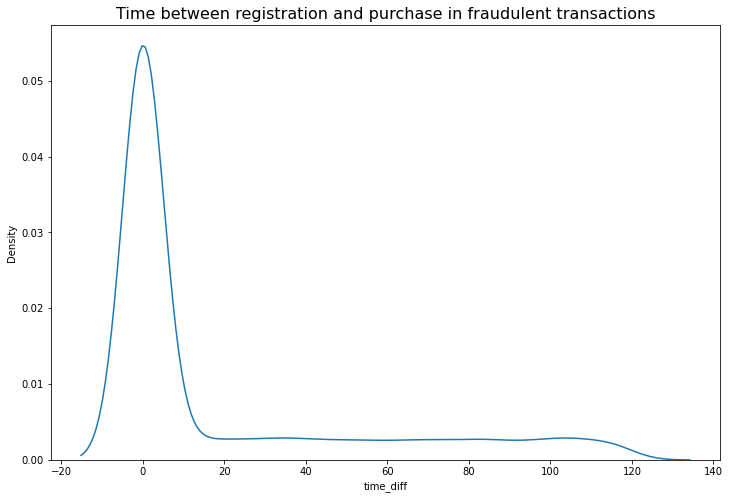

In [44]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(df_new.loc[df_new['class']==1,'time_diff'])
ax.set_title('Time between registration and purchase in fraudulent transactions', fontsize=16)
plt.show()

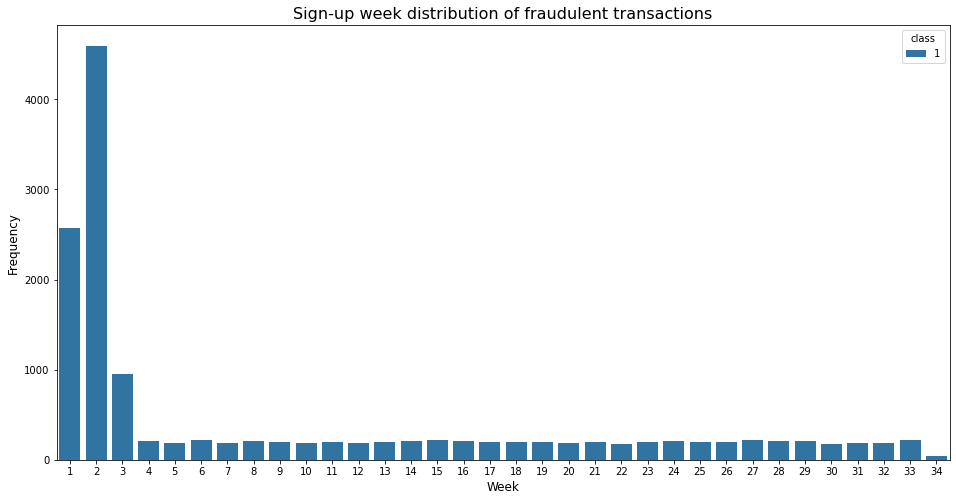

In [45]:
fig,ax = plt.subplots(figsize=(16,8))
sns.countplot('signup_week', data=df_new[df_new['class']==1], hue='class',ax = ax)
ax.set_title('Sign-up week distribution of fraudulent transactions', fontsize=16)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

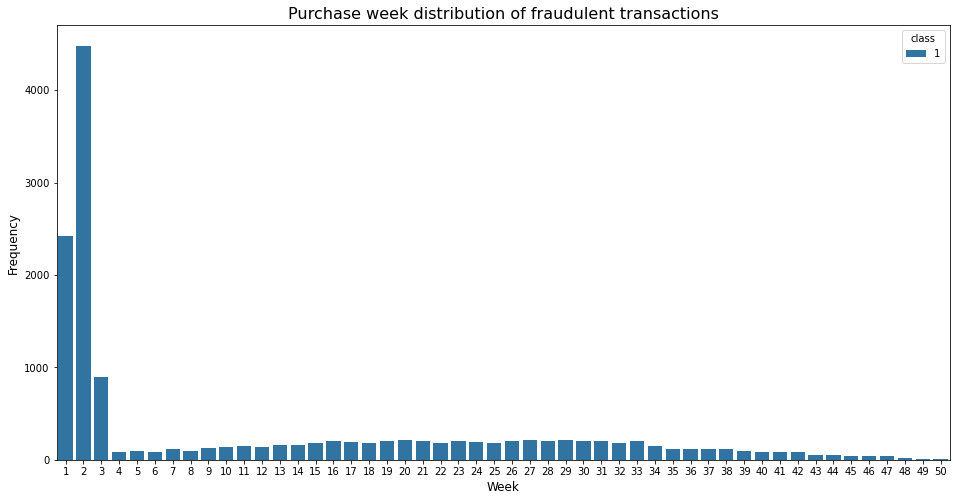

In [46]:
fig,ax = plt.subplots(figsize=(16,8))
sns.countplot('purchase_week', data=df_new[df_new['class']==1], hue='class',ax = ax)
ax.set_title('Purchase week distribution of fraudulent transactions', fontsize=16)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

### <font color='green'>Based on above plots, we can observe that for most fraudulent activities, there is little time difference between registration and purchase. In addition, an overwhelming number of frauds are committed during the first 3 weeks of a year.</font>

In [47]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC

clf = DecisionTreeClassifier()
sv = SVC()

# Train Decision Tree Classifer
pipe1 = make_pipeline(col_trans, clf)
pipe2 = make_pipeline(col_trans, sv)

pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['source', 'browser',
                                                   'sex'])])),
                ('svc', SVC())])

In [48]:
#Predict the response for test dataset
y_pred_dt = pipe1.predict(X_test)
y_pred_sv = pipe2.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[32852  1414]
 [ 1155  2357]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     34266
           1       0.63      0.67      0.65      3512

    accuracy                           0.93     37778
   macro avg       0.80      0.81      0.80     37778
weighted avg       0.93      0.93      0.93     37778



In [50]:
#calculate accuracy
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_sv))

0.9319974588384774
0.9070358409656414


# <font color='blue'>Customer Segmentation</font>

In [51]:
df_new.head()

,purchase_value,source,browser,sex,class,category,dob,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day
0,65278,SEO,Chrome,M,0,home_essentials,22-2-1976,52,1,1,9,1,16,5
1,96399,Ads,Chrome,F,0,apparels,2-1-1962,0,1,1,23,6,24,0
2,57296,SEO,Opera,M,1,electronics,5-3-1962,0,12,12,1,3,1,3
3,43650,SEO,Safari,M,0,health_care,3-7-1974,5,1,1,18,1,19,0
4,45016,Ads,Safari,M,0,home_essentials,25-8-1970,50,1,1,30,1,37,2


In [52]:
df_new.nunique()

purchase_value    77387
source                3
browser               5
sex                   2
class                 2
category              5
dob               13745
time_diff           120
device_count         20
ip_count             20
signup_week          34
signup_day            7
purchase_week        51
purchase_day          7
dtype: int64

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   purchase_value  151112 non-null  int64 
 1   source          151112 non-null  object
 2   browser         151112 non-null  object
 3   sex             146185 non-null  object
 4   class           151112 non-null  int64 
 5   category        151112 non-null  object
 6   dob             146188 non-null  object
 7   time_diff       151112 non-null  int64 
 8   device_count    151112 non-null  int64 
 9   ip_count        151112 non-null  int64 
 10  signup_week     151112 non-null  int64 
 11  signup_day      151112 non-null  int64 
 12  purchase_week   151112 non-null  int64 
 13  purchase_day    151112 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 21.3+ MB


In [54]:
df_new['dob'].dropna(inplace=True)

In [55]:
df_new.isna().sum()

purchase_value       0
source               0
browser              0
sex               4927
class                0
category             0
dob               4924
time_diff            0
device_count         0
ip_count             0
signup_week          0
signup_day           0
purchase_week        0
purchase_day         0
dtype: int64

In [56]:
df_new['dob'] = df_new['dob'].astype("string")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   purchase_value  151112 non-null  int64 
 1   source          151112 non-null  object
 2   browser         151112 non-null  object
 3   sex             146185 non-null  object
 4   class           151112 non-null  int64 
 5   category        151112 non-null  object
 6   dob             146188 non-null  string
 7   time_diff       151112 non-null  int64 
 8   device_count    151112 non-null  int64 
 9   ip_count        151112 non-null  int64 
 10  signup_week     151112 non-null  int64 
 11  signup_day      151112 non-null  int64 
 12  purchase_week   151112 non-null  int64 
 13  purchase_day    151112 non-null  int64 
dtypes: int64(9), object(4), string(1)
memory usage: 21.3+ MB


In [57]:
#Converting dtype of column:dob to pandas datetime
df_new['dob'] = pd.to_datetime(df_new['dob'])

In [58]:

from datetime import date
def age(born):
    today = date.today()
    age = today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
    return age
  
df_new['age'] = df_new['dob'].apply(age)
df_new.head(1)

,purchase_value,source,browser,sex,class,category,dob,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day,age
0,65278,SEO,Chrome,M,0,home_essentials,1976-02-22,52,1,1,9,1,16,5,46.0


In [59]:
#df_new['age'].isin([20])
if sum(df_new["age"].astype("str").str.contains("25")) > 0:
    print("found")
else:
    print("not found")

found


In [60]:
df_new.describe()

,purchase_value,class,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day,age
count,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,146188.000000
mean,50521.469003,0.093646,55.817824,1.684367,1.602719,16.501740,3.027265,24.545880,3.011118,40.953772
std,28533.667117,0.291336,36.486543,2.616954,2.596240,9.814287,2.006972,11.664424,2.007051,9.600442
min,1016.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,25.000000
25%,25919.000000,0.000000,24.000000,1.000000,1.000000,8.000000,1.000000,16.000000,1.000000,34.000000
50%,50484.000000,0.000000,56.000000,1.000000,1.000000,16.000000,3.000000,25.000000,3.000000,40.000000
75%,75296.250000,0.000000,88.000000,1.000000,1.000000,25.000000,5.000000,33.000000,5.000000,47.000000
max,100092.000000,1.000000,119.000000,20.000000,20.000000,34.000000,6.000000,51.000000,6.000000,83.000000


### <font color='blue'>Data Visualization</font>

### <font color='blue'>Distribution Plots</font>

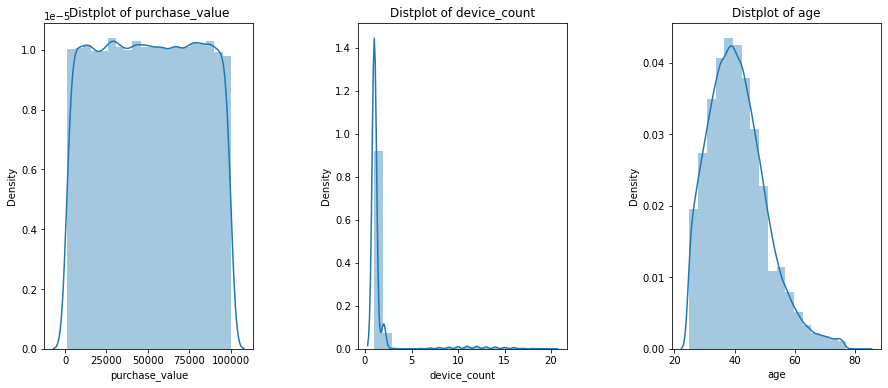

In [61]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['purchase_value','device_count','age']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df_new[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

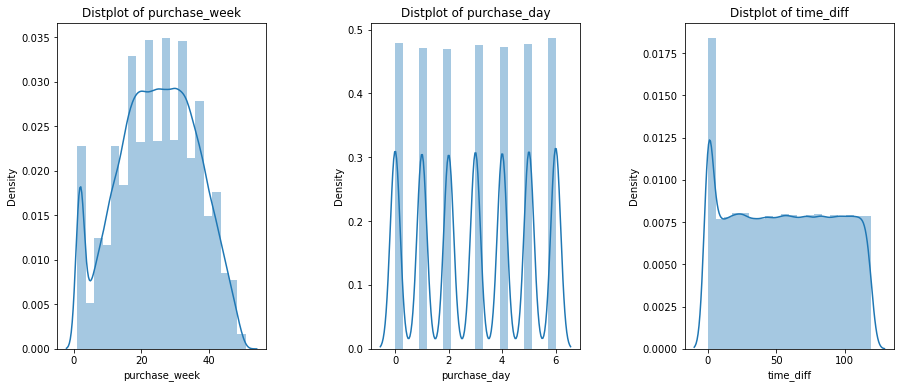

In [62]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['purchase_week','purchase_day','time_diff']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df_new[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### <font color='green'>From distplot we can observe that the density of the different variable</font>
### <font color='green'>purchase_value: most of the people have purchase between 15k-80k</font>
### <font color='green'>device_count: mostly this is one or two</font>
### <font color='green'>age: customer with age=40 are heighest</font>
### <font color='green'>purchase_week: purchasing is highest between 10-30 weeks</font>
### <font color='green'>purchase_day: most of the people have purchase between 15k-80k($)</font>
### <font color='green'>time_diff: people with no time difference in signup & purchase time are more</font>

### <font color='blue'>Count Plots</font>

### <font color='blue'>Count Plot for Sex</font>

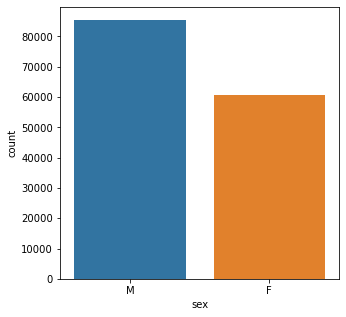

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df_new)
plt.show()

### <font color='green'>From above we can infer that most of the customers are male</font>

### <font color='blue'>Count Plot for Source</font>

<AxesSubplot:xlabel='source', ylabel='count'>

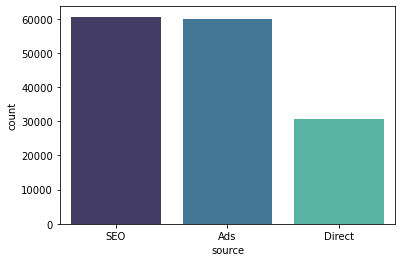

In [64]:
sns.countplot(df_new['source'], color='gray',palette='mako')

### <font color='green'>Inference:source: SEO and Ads are top most</font>

### <font color='blue'>Count Plot for Browser</font>

<AxesSubplot:xlabel='browser', ylabel='count'>

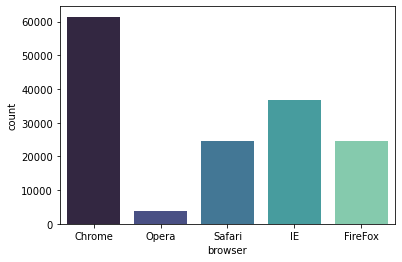

In [65]:
sns.countplot(df_new['browser'], color='gray',palette='mako')

### <font color='green'>Inference:browser: Chrome is at the top most</font>

### <font color='blue'>Count Plot for Category</font>

<AxesSubplot:xlabel='category', ylabel='count'>

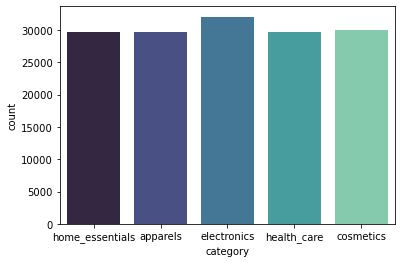

In [66]:
sns.countplot(df_new['category'], color='gray',palette='mako')

### <font color='green'>Inference:category: Eelectronic Items are at the top most</font>

### <font color='blue'>Violin Plots</font>

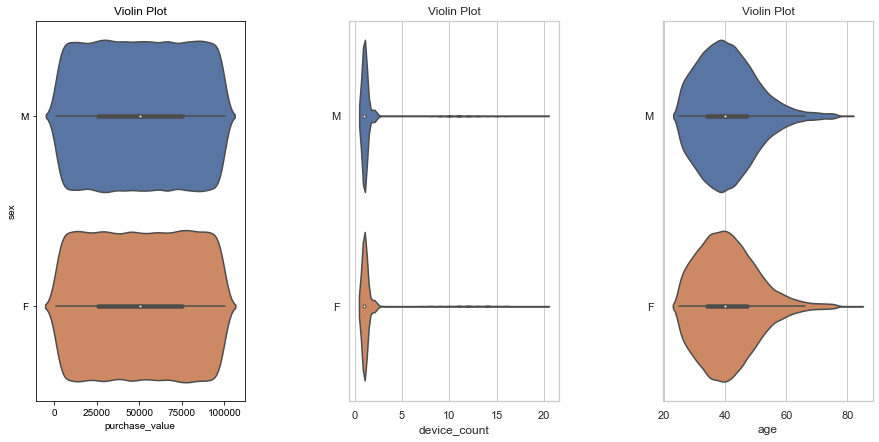

In [67]:
plt.figure(1,figsize=(15,7))
n=0
for col in ['purchase_value','device_count','age']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=col,y='sex',data=df_new)
    plt.ylabel('sex' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

### <font color='green'>Now let’s find out the age range which has large number of customers and as we know the age(min)=25 and age(max)=83 so we will divide the age in different ranges like 25-30,31-35,36-40,41-45,46-50,51-55,56-60 and above 60.</font>

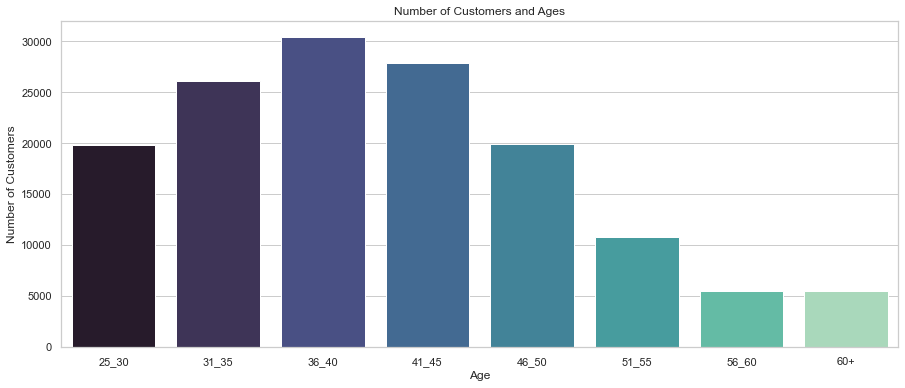

In [68]:
age_25_30 = df_new.age[(df_new.age>=25) & (df_new.age<=30)]
age_31_35 = df_new.age[(df_new.age>=31) & (df_new.age<=35)]
age_36_40 = df_new.age[(df_new.age>=36) & (df_new.age<=40)]
age_41_45 = df_new.age[(df_new.age>=41) & (df_new.age<=45)]
age_46_50 = df_new.age[(df_new.age>=46) & (df_new.age<=50)]
age_51_55 = df_new.age[(df_new.age>=51) & (df_new.age<=55)]
age_56_60 = df_new.age[(df_new.age>=56) & (df_new.age<=60)]
age_60above = df_new.age[df_new.age>=61]

agex = ['25_30','31_35','36_40','41_45','46_50','51_55','56_60','60+']
agey = [len(age_25_30.values),len(age_31_35.values),len(age_36_40.values),len(age_41_45.values),
        len(age_46_50.values),len(age_51_55.values),len(age_56_60.values),len(age_60above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of Customers and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

### <font color='green'>Inference: Mamimum customers's ages is between 30 to 50.</font>

### <font color='blue'>Range of time_diff(purchase date - signup date) Vs No. of Customers:</font>

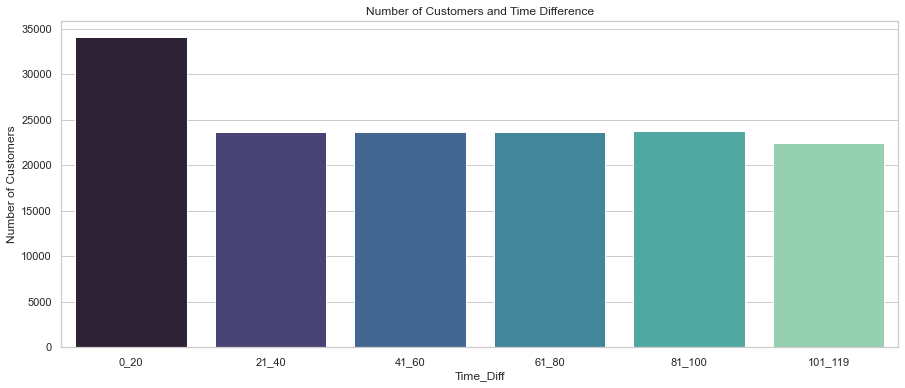

In [69]:
time_diff_0_20 = df_new.age[(df_new.time_diff>=0) & (df_new.time_diff<=20)]
time_diff_21_40 = df_new.age[(df_new.time_diff>=21) & (df_new.time_diff<=40)]
time_diff_41_60 = df_new.age[(df_new.time_diff>=41) & (df_new.time_diff<=60)]
time_diff_61_80 = df_new.age[(df_new.time_diff>=61) & (df_new.time_diff<=80)]
time_diff_81_100 = df_new.age[(df_new.time_diff>=81) & (df_new.time_diff<=100)]
time_diff_101_119 = df_new.age[(df_new.time_diff>=101) & (df_new.time_diff<=119)]


agex = ['0_20','21_40','41_60','61_80','81_100','101_119']
agey = [len(time_diff_0_20.values),len(time_diff_21_40.values),len(time_diff_41_60.values),len(time_diff_61_80.values),
        len(time_diff_81_100.values),len(time_diff_101_119.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of Customers and Time Difference')
plt.xlabel('Time_Diff')
plt.ylabel('Number of Customers')
plt.show()

### <font color='green'>Inference: Time_Diff range-0-20 has heighest number of customers.</font>

### <font color='blue'>Range of device counts Vs No. of Customers:</font>

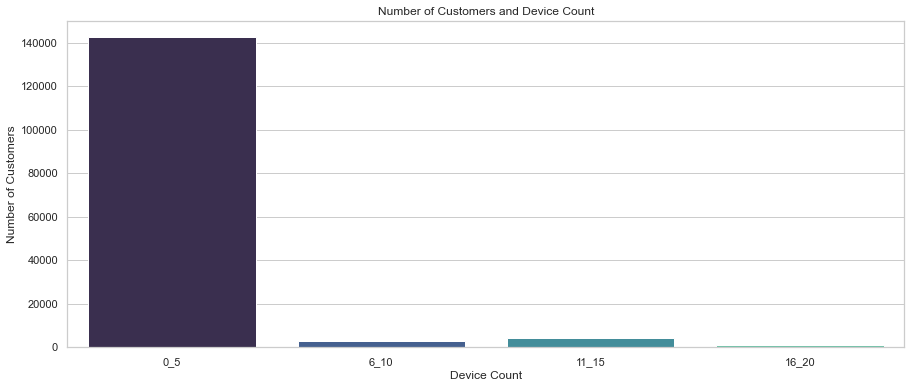

In [70]:
device_count_0_5 = df_new.age[(df_new.device_count>=0) & (df_new.device_count<=5)]
device_count_6_10 = df_new.age[(df_new.device_count>=6) & (df_new.device_count<=10)]
device_count_11_15 = df_new.age[(df_new.device_count>=11) & (df_new.device_count<=15)]
device_count_16_20 = df_new.age[(df_new.device_count>=16) & (df_new.device_count<=20)]



agex = ['0_5','6_10','11_15','16_20']
agey = [len(device_count_0_5.values),len(device_count_6_10.values),len(device_count_11_15.values),len(device_count_16_20.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of Customers and Device Count')
plt.xlabel('Device Count')
plt.ylabel('Number of Customers')
plt.show()

### <font color='green'>Inference: Customer with device count:0-5 are heigest</font>

### <font color='blue'>Relationship between Purchase_Value and Age:</font>

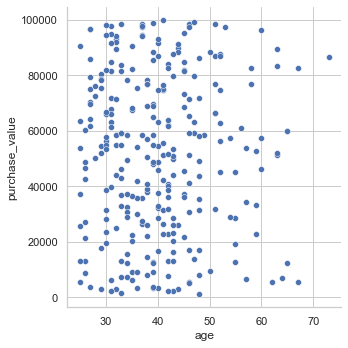

In [71]:
sns.relplot(x='age',y='purchase_value',data=df_new.head(300))

### <font color='green'>As we can see above that as the dataframe have large number of rows so plotting is done for top 300 rows</font>
### <font color='green'>Interference:Customers having age:30-50 purchased more as comparision to other age ranges.</font>

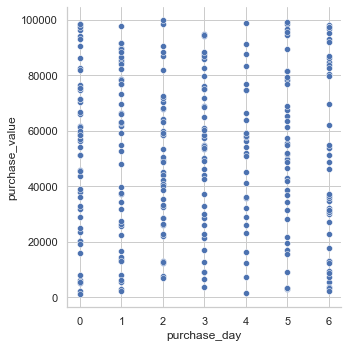

In [72]:
sns.relplot(x='purchase_day',y='purchase_value',data=df_new.head(300))

### <font color='green'>Interference:Purchase is heighest on weekend and on monday</font>

In [73]:
#Checking null values columnwise
df_new.isna().sum()

purchase_value       0
source               0
browser              0
sex               4927
class                0
category             0
dob               4924
time_diff            0
device_count         0
ip_count             0
signup_week          0
signup_day           0
purchase_week        0
purchase_day         0
age               4924
dtype: int64

In [74]:
#Filling null values with mean of age
df_new['age'].fillna(int(df_new['age'].mean()), inplace=True)

### <font color='blue'>Clustering based on Age and Purchase Value:</font>

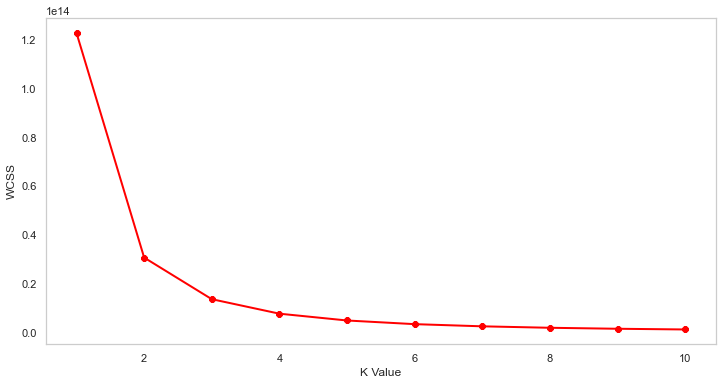

In [75]:
X1=df_new.loc[:,['age','purchase_value']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

### <font color='green'>So as we can see above that after K=4 it is constant so let’s consider cluster(K)=4.</font>

In [76]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[3 0 3 ... 2 3 2]


In [77]:
print(kmeans.cluster_centers_)

[[4.09052997e+01 8.71330084e+04]
 [4.09495630e+01 3.72186991e+04]
 [4.09346943e+01 1.30150663e+04]
 [4.09025578e+01 6.19263139e+04]]


In [78]:
kmeans.labels_[0:2]

array([3, 0])

### <font color='green'>As we can see above that label is nothing but the cluster’s label(0,1,2,3). And centroid for clusters is as shown above 1st one for cluster(0) and last one for cluster(3).</font>

### <font color='green'>Lets cluster using the top 150 values of the dataframe</font>

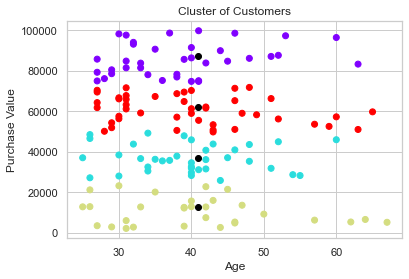

In [79]:
plt.scatter(X1[0:149,0],X1[0:149,1],c=kmeans.labels_[0:149],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.show()

### <font color='green'>As we can see above that it has clustered based on the purchase value only</font>

In [80]:
#Converting the categorical variable in numeric form and creating new data frame: df_mapped
df_mapped = df_new.copy()
df_mapped['category'] = df_new['category'].map({'home_essentials':0,'apparels':1,'electronics':2,
                                                'health_care':3,'cosmetics':4,})
df_mapped['sex'] = df_new['sex'].map({'M':0,'F':1})
df_mapped['source'] = df_new['source'].map({'SEO':0,'Ads':1,'Direct':2})
df_mapped.head(1)

,purchase_value,source,browser,sex,class,category,dob,time_diff,device_count,ip_count,signup_week,signup_day,purchase_week,purchase_day,age
0,65278,0,Chrome,0.0,0,0,1976-02-22,52,1,1,9,1,16,5,46.0


### <font color='blue'>Clustering based on Age and Category:</font>

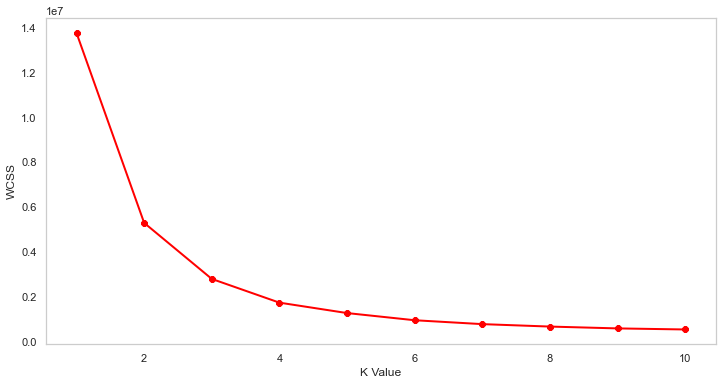

In [81]:
X2=df_mapped.loc[:,['age','category']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

### <font color='green'>So as we can see above that after K=5 it is constant so let’s consider cluster(K)=5.</font>

In [82]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[0 1 1 ... 2 0 0]


In [83]:
print(kmeans.cluster_centers_)

[[44.200689    2.01490386]
 [65.77356124  2.01129058]
 [29.62543293  2.01754791]
 [52.70257737  1.9764559 ]
 [37.38363434  1.99407258]]


In [84]:
kmeans.labels_[0:2]

array([0, 1])

### <font color='green'>As we can see above that label is nothing but the cluster’s label(0,1,2,3,4). And centroid for clusters is as shown above 1st one for cluster(0) and last one for cluster(4).</font>

### <font color='green'>Lets cluster using the top 150 values of the dataframe</font>

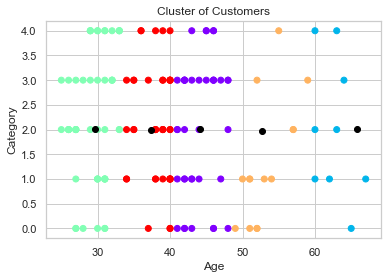

In [85]:
plt.scatter(X2[0:149,0],X2[0:149,1],c=kmeans.labels_[0:149],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Category')
plt.show()

In [86]:
df_mapped.isna().sum()

purchase_value       0
source               0
browser              0
sex               4927
class                0
category             0
dob               4924
time_diff            0
device_count         0
ip_count             0
signup_week          0
signup_day           0
purchase_week        0
purchase_day         0
age                  0
dtype: int64

In [87]:
#Remving null values
df_mapped.dropna(inplace=True)

In [88]:
df_mapped.isna().sum()

purchase_value    0
source            0
browser           0
sex               0
class             0
category          0
dob               0
time_diff         0
device_count      0
ip_count          0
signup_week       0
signup_day        0
purchase_week     0
purchase_day      0
age               0
dtype: int64

### <font color='blue'>Clustering based on Sex and Category:</font>

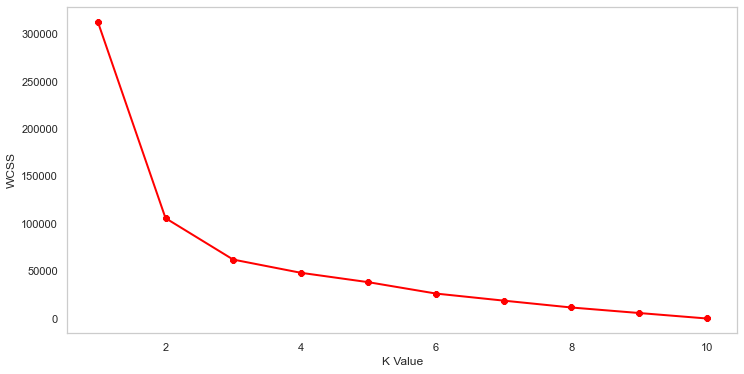

In [89]:
X3=df_mapped.loc[:,['sex','category']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

### <font color='green'>So as we can see above that after K=5 it is constant so let’s consider cluster(K)=5.</font>

In [90]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[4 1 3 ... 2 3 1]


In [91]:
print(kmeans.cluster_centers_)

[[ 2.64152650e-01  3.63225719e+00]
 [ 4.16565033e-01  1.00000000e+00]
 [ 1.00000000e+00  2.48428751e+00]
 [-1.27675648e-14  2.00000000e+00]
 [ 4.13311747e-01 -1.03472786e-13]]


### <font color='green'>As we can see above that label is nothing but the cluster’s label(0,1,2,3,4). And centroid for clusters is as shown above 1st one for cluster(0) and last one for cluster(4).</font>

### <font color='green'>Lets cluster using the top 150 values of the dataframe</font>

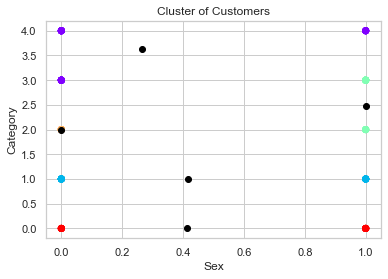

In [92]:
plt.scatter(X3[0:149,0],X3[0:149,1],c=kmeans.labels_[0:149],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Sex')
plt.ylabel('Category')
plt.show()